# Bài tập 4

Bùi Chí Dũng - 1712364

## Câu 1 (1 điểm)

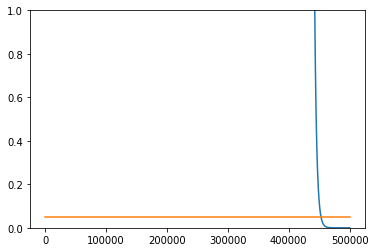

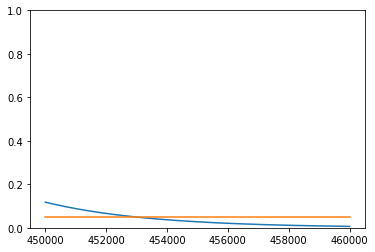

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dvc = 10
eps = 0.05
dc = 0.95

def mH(N):
    return N**dvc

N = np.arange(dvc*10, 500000)
conf = 4*np.exp(dvc*np.log(2*N) - 1/8 * eps*eps*N)
plt.plot(N, conf)
plt.plot([0, 500000], [0.05, 0.05])
plt.ylim([0, 1])
plt.show()

N = np.arange(450000, 460000)
conf = 4*np.exp(dvc*np.log(2*N) - 1/8 * eps*eps*N)
plt.plot(N, conf)
plt.plot([450000, 460000], [0.05, 0.05])
plt.ylim([0, 1])
plt.show()


Để phân tích từ phương trình tìm ra N rất khó nên ta đưa vào đồ thị và xem biểu diễn của nó để tìm ra kết quả, theo như đồ thị trên, qua nhiều lần chạy thử và tìm khoảng giao giữa 2 đường xanh và cam, ta giới hạn lại được khoảng nghiệm nằm trong 450000-460000, ở đây ta thấy giá trị nó ở khoảng hơn 452000 và nhỏ hơn 454000, vì vậy giá trị gần nhất của nó sẽ là [d] 460,000

## Câu 2 (1 điểm)

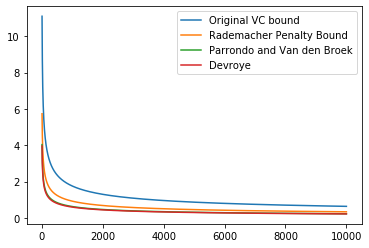

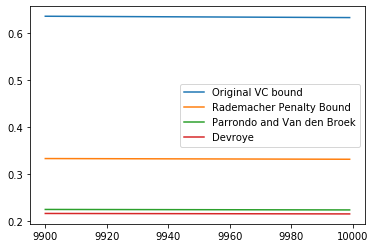

In [2]:
delta = 0.05
dvc = 50

def original(N):
    return np.sqrt(8/N * np.log(4*mH(2*N)/delta))
def rademacher(N):
    return np.sqrt(2*np.log(2*N*mH(N))/N) + np.sqrt(2/N*np.log(1/delta)) + 1/N
def parrondo(N):
    return 1/N + 0.5*np.sqrt(4/N**2 + 4/N * np.log(6*mH(2*N)/delta))
def devroye(N):
    return (2/N + np.sqrt(4/N**2 + 4*(1-2/N)*(1/(2*N))*(np.log(4) + 2*dvc*np.log(N) - np.log(delta))))/(2*(1-2/N))

N = np.arange(10, 10000, dtype = np.float64)
plt.plot(N, original(N))
plt.plot(N, rademacher(N))
plt.plot(N, parrondo(N))
plt.plot(N, devroye(N))
plt.legend(["Original VC bound","Rademacher Penalty Bound","Parrondo and Van den Broek","Devroye",])
plt.show()

N = np.arange(9900, 10000, dtype = np.float64)
plt.plot(N, original(N))
plt.plot(N, rademacher(N))
plt.plot(N, parrondo(N))
plt.plot(N, devroye(N))
plt.legend(["Original VC bound","Rademacher Penalty Bound","Parrondo and Van den Broek","Devroye",])
plt.show()




Qua đồ thị, ta thấy được Devroye có giá trị nhỏ nhất với N = 10000. Chọn [d] Devroye.

## Câu 3 (1 điểm)

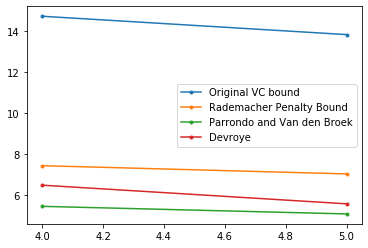

In [3]:
N = np.arange(4, 6, dtype=np.float64)
plt.plot(N, original(N), ".-")
plt.plot(N, rademacher(N), ".-")
plt.plot(N, parrondo(N), ".-")
plt.plot(N, devroye(N), ".-")
plt.legend(["Original VC bound","Rademacher Penalty Bound","Parrondo and Van den Broek","Devroye",])
plt.show()

Giới hạn khoảng N từ 4-6 ta nhận thấy rõ rệt Parrondo and Van den Broek cho giá trị nhỏ nhất khi N = 5. Chọn [c] Parrondo and Van den Broek

## Câu 4 (1 điểm)

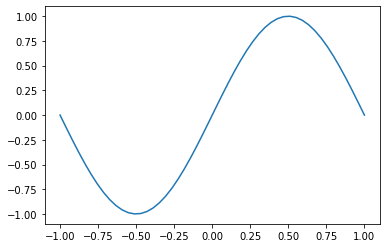

In [4]:
def f(x):
    return np.sin(np.pi*x)
x = np.linspace(-1, 1)
plt.plot(x, f(x))
plt.show()

In [5]:
import scipy.integrate as integrate
import scipy
def error(a):
    return integrate.quad(lambda x: (f(x) - a*x)**2, -1, 1)[0]
errs = [error(a) for a in np.linspace(-2, 2)]
#plt.plot(np.linspace(-2, 2), errs)
#plt.show()
optim = scipy.optimize.minimize_scalar(error, bounds = (-2,2))
print(optim)

#plt.fill_between(x, f(x), optim.x*x)
#plt.legend(["Error"])
#plt.show()

     fun: 0.39207289814597335
    nfev: 9
     nit: 5
 success: True
       x: 0.954929658551372


In [6]:
errors = []
a2 = []
vars_s = []
for i in range(10000):
    x1 = np.random.rand()*2-1
    x2 = np.random.rand()*2-1
    X = np.array([[x1], [x2]])
    
    y1 = f(x1)
    y2 = f(x2)
    y = np.array([[y1], [y2]])
    
    a = np.linalg.solve(X.T @ X, X.T @ y)[0][0]
    var = scipy.integrate.quad(lambda x: (a*x - 1.4286*x)**2, -1, 1)
    error = scipy.integrate.quad(lambda x: (a*x - f(x))**2, -1, 1)
    
    a2.append(a)
    vars_s.append(var)
    errors.append(error)
variance = np.mean(vars_s)
error = np.mean(errors)
print("variance = ", variance)
print("error", error)

a_hat = np.mean(a2)
print("a_hat", a_hat)

#plt.plot(x, f(x))
#plt.plot(x, a_hat*x)
#plt.show()

variance =  0.2385399365243994
error 0.5095419554396112
a_hat 1.4291627500753936


Chọn [e], none of the above, do a_hat = 1.4408937310026835.

## Câu 5 (1 điểm)

In [7]:
a_hat = 1.4408937310026835 #a_hat thay đổi theo từng lần chạy
expected_a = 0.954929658551372
bias = scipy.integrate.quad(lambda x: (a_hat*x - f(x))**2, -1, 1)[0]/2
bias

0.27475680897747456

variance =  0.23901974084228222 ~ 0.2
error 0.5137261715848473 ~ 0.5
bias = 0.27475680897747456 ~ 0.3

bias tính ra được gần bằng 0.3. Vậy chọn [b] 0.3

## Câu 6 (1 điểm)

Tính từ trên, ta được variance ~= 0.2. Vậy chọn [a] 0.2

## Câu 7 (1 điểm)

Chọn [b] Hypotheses of the form h(x) = ax

## Câu 8 (1 điểm)

Growth function bắt đầu ở 2^n, sau đó hệ số của nhị thức khởi động và tạo ra điểm dừng. Ở đây VC dimensions = điểm dừng nhỏ nhất - 1.
Hệ số đầu tiên chuyển sang dương khi N = q
${N \choose q} = 1 \qquad \Rightarrow \qquad N = q $

Vì vậy mà $m_{\mathcal H}(N+1) = m_{\mathcal H}(q+1) $.


Từ đó q+1 là break point nhỏ nhất. The VC dimensions là q. Chọn [c] q

## Câu 9 (1 điểm)

Min bound: Các tập có thể không giao nhau, tạo ra tập hypothesis trống và 1 zero VC dimension.
Max bound: Giao điểm của các tập hợp là một trong những tập hợp. Sự thay thế VC dimension tối đa có thể không chính xác vì giao điểm bằng với một tập hợp có kích thước VC nhỏ hơn.


Chọn [b]

## Câu 10 (1 điểm)

Min bound: tập hợp lớn nhất
Max bound: 

Chọn [e]